In [13]:
import numpy as np
file_path = '/home/krishna/Downloads/mnist.npz'
file = np.load(file_path)
x_train=file['x_train']
y_train=file['y_train']

In [15]:
X = []
Y = []
for i in range(y_train.shape[0]):
    if y_train[i] == 0:
        X.append(x_train[i])
        Y.append(-1)
    elif y_train[i]==1:
        X.append(x_train[i])
        Y.append(y_train[i])

X = np.array(X)
Y = np.array(Y)

In [16]:
print(X.shape)
print(Y.shape)

(12665, 28, 28)
(12665,)


In [17]:
print(Y)

[-1  1  1 ...  1 -1  1]


In [18]:

X_flat = X.reshape(X.shape[0], -1)

mean_vec = np.mean(X_flat, axis=0)

centered_data = X_flat - mean_vec
cov_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
p = 5
pca_matrix = eigenvectors[:, :p]
X_train = np.dot(centered_data, pca_matrix)


In [19]:
print(X_train)
print("-"*100)
print(X_train.shape)

[[-1119.66338805  -321.49791034   402.41141565   219.14716332
   -144.27936838]
 [  883.61589229  -907.38629475  -622.50355094   -94.58850625
   -270.5902168 ]
 [  798.39309385   842.90971227   484.0627968    -16.35519247
   -209.62860077]
 ...
 [  726.57401035  -652.36435206  -528.07971075  -169.6290383
   -748.7172408 ]
 [ -816.3685892   -679.5585419    625.93484031  1072.03355385
   -304.59712958]
 [  821.88725405  -356.09638457  -491.30448403   -78.84106524
   -649.7960371 ]]
----------------------------------------------------------------------------------------------------
(12665, 5)


In [20]:
val = []
val_labels = []
cnt = 0
cnt1 = 0
X_train_filtered = []
Y_train_filtered = []

for i in range(len(X_train)):
    if cnt < 1000 and Y[i] == 1:
        val.append(X_train[i])
        val_labels.append(Y[i])
        cnt += 1
    elif cnt1 < 1000 and Y[i] == -1:
        val.append(X_train[i])
        val_labels.append(Y[i])
        cnt1 += 1
    else:
        X_train_filtered.append(X_train[i])
        Y_train_filtered.append(Y[i])


X_train_filtered = np.array(X_train_filtered)
Y_train_filtered = np.array(Y_train_filtered)
val = np.array(val)
val_labels = np.array(val_labels)
print(X_train_filtered.shape)
print(Y_train_filtered.shape)
print(val.shape)
print(val_labels.shape)

(10665, 5)
(10665,)
(2000, 5)
(2000,)


In [21]:
import numpy as np

def find_best_split(X, y):
    best_feature = None
    best_split = None
    min_error = float('inf')
    for feature in range(X.shape[1]):
        unique_values = np.unique(X[:, feature])
        unique_values.sort()
        midpoints = (unique_values[:-1] + unique_values[1:]) / 2

        for split in midpoints:
            left_indices = X[:, feature] <= split
            right_indices = X[:, feature] > split

            error_left = np.sum(y[left_indices] != -1) / np.sum(left_indices)
            error_right = np.sum(y[right_indices] != 1) / np.sum(right_indices)
            weighted_error = (np.sum(left_indices) * error_left + np.sum(right_indices) * error_right) / len(y)

            if weighted_error < min_error:
                min_error = weighted_error
                best_feature = feature
                best_split = split

    return best_feature, best_split

best_feature, best_split = find_best_split(X_train_filtered, Y_train_filtered)

print("Best feature:", best_feature)
print("Best split:", best_split)

Best feature: 0
Best split: 206.7422994970151


In [22]:
# Check if best_split is not None and is a float value
if isinstance(best_split, float):
    best_split_value = best_split

    # Predictions based on the best split
    predictions = np.where(X_train_filtered[:, best_feature] <= best_split_value, np.mean(Y_train_filtered[X_train_filtered[:, best_feature] <= best_split_value]), np.mean(Y_train_filtered[X_train_filtered[:, best_feature] > best_split_value]))

    # Compute residue
    residue = Y_train_filtered - 0.01 * predictions

    print("Residue:", residue)
else:
    print("No best split found or invalid format.")



Residue: [ 0.99009743  0.99009743  0.99009743 ...  0.99009743 -0.99008949
  0.99009743]


In [23]:

predictions_h1 = np.where(X_train_filtered[:, best_feature] <= best_split_value, np.mean(Y_train_filtered[X_train_filtered[:, best_feature] <= best_split_value]), np.mean(Y_train_filtered[X_train_filtered[:, best_feature] > best_split_value]))
negative_gradients_h2 = Y_train_filtered - 0.01 * predictions_h1

def find_best_split(X_train, Y_train):
    best_split_dim = None
    best_split_value = None
    min_ssr = float('inf')

    for dim in range(X_train.shape[1]):
        unique_values = np.unique(X_train[:, dim])
        sorted_values = np.sort(unique_values)

        for i in range(len(sorted_values) - 1):
            split = (sorted_values[i] + sorted_values[i+1]) / 2

            left_indices = X_train[:, dim] <= split
            right_indices = ~left_indices
            left_y = Y_train[left_indices]
            right_y = Y_train[right_indices]

            left_mean = np.mean(left_y)
            right_mean = np.mean(right_y)
            left_ssr = np.sum((left_y - left_mean) ** 2)
            right_ssr = np.sum((right_y - right_mean) ** 2)
            total_ssr = left_ssr + right_ssr

            if total_ssr < min_ssr:
                min_ssr = total_ssr
                best_split_dim = dim
                best_split_value = split

    return best_split_dim, best_split_value

best_split_dim_h2, best_split_value_h2 = find_best_split(X_train_filtered, negative_gradients_h2)

predictions_h2 = np.where(X_train_filtered[:, best_split_dim_h2] <= best_split_value_h2, np.mean(negative_gradients_h2[X_train_filtered[:, best_split_dim_h2] <= best_split_value_h2]), np.mean(negative_gradients_h2[X_train_filtered[:, best_split_dim_h2] > best_split_value_h2]))


residue = Y_train_filtered - 0.01 * predictions_h1 - 0.01 * predictions_h2

print("Residue:", residue)


Residue: [ 0.98029388  0.98029388  0.98029388 ...  0.98029388 -0.98027808
  0.98029388]


In [24]:
import matplotlib.pyplot as plt

mse_values = []
test_predictions = []

for i in range(300):

    negative_gradients = Y_train_filtered - 0.01 * predictions_h1

    best_split_dim, best_split_value = find_best_split(X_train_filtered, negative_gradients)

    predictions_h2 = np.where(X_train_filtered[:, best_split_dim] <= best_split_value, np.mean(negative_gradients[X_train_filtered[:, best_split_dim] <= best_split_value]), np.mean(negative_gradients[X_train_filtered[:, best_split_dim] > best_split_value]))

    residue -= 0.01 * predictions_h2

    val_predictions = np.where(val[:, best_split_dim] <= best_split_value, np.mean(negative_gradients[X_train_filtered[:, best_split_dim] <= best_split_value]), np.mean(negative_gradients[X_train_filtered[:, best_split_dim] > best_split_value]))
    mse = np.mean((val_labels - val_predictions) ** 2)
    mse_values.append(mse)

    if mse == min(mse_values):
        test_predictions = 0.01 * predictions_h1 + 0.01 * predictions_h2





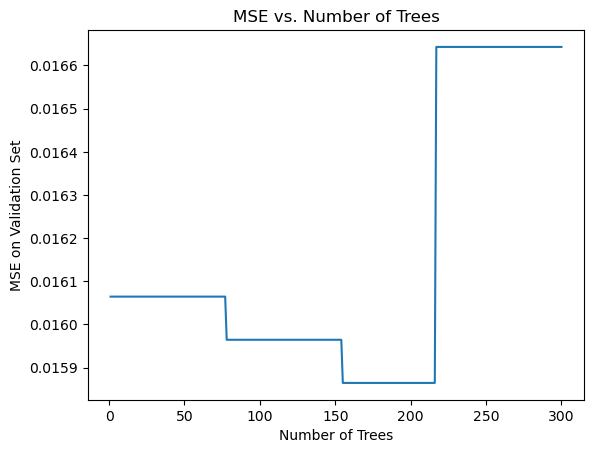

In [34]:
plt.plot(range(1, 301), mse_values)
plt.xlabel('Number of Trees')
plt.ylabel('MSE on Validation Set')
plt.title('MSE vs. Number of Trees')
plt.show()


In [35]:
X_test=file['x_test']
Y_test=file['y_test']
X = []
Y = []
for i in range(X_test.shape[0]):
    if Y_test[i] == 0:
        X.append(X_test[i])
        Y.append(-1)
    elif Y_test[i]==1:
        X.append(X_test[i])
        Y.append(Y_test[i])
X = np.array(X)
Y = np.array(Y)

In [36]:

X_flat = X.reshape(X.shape[0], -1)
best_split
mean_vec = np.mean(X_flat, axis=0)

centered_data = X_flat - mean_vec
cov_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
p = 5
pca_matrix = eigenvectors[:, :p]
X_test= np.dot(centered_data, pca_matrix)
print(X_test.shape)



(2115, 5)


In [37]:
pred=[]
for i in range(len(Y)):
    if X_test[i][0]<best_split:
        pred.append(residue_1)
    else:
        pred.append(residue_2)
cnt=0
for i in range(len(pred)):

    cnt+=(pred[i]-Y[i])**2

print(cnt/len(pred))


0.013238770685579196
